In [1]:
import numpy as np
import time
from sklearn import datasets
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from matplotlib import pyplot as plt
from ast import literal_eval

In [2]:
df = pd.read_csv("miem_embeddings.csv",converters={"vectors": literal_eval})
df.head()

,num,title,type,title_lemmatized,vectors
0,1.0,Изучение транспорта заряженных коллоидных част...,НИР,изучение транспорт заряжать коллоидный частица...,"[0.021411802619695663, -0.012915868312120438, ..."
1,2.0,Изучение конвекции Марангони и транспорта колл...,НИР,изучение конвекция марангонь транспорт коллоид...,"[0.03792756423354149, -0.017522942274808884, 0..."
2,3.0,Разработка программного комплекса решения эндш...,НИР,разработка программный комплекс решение эндшпи...,"[0.027339119464159012, -0.0043623377569019794,..."
3,4.0,Программа объединения точек платежей для проти...,Прогр.,программа объединение точка платеж противодейс...,"[0.014935723505914211, -0.006338078528642654, ..."
4,5.0,Антифрод (antifraud),Прогр.,антифрод antifraud,"[0.013650435023009777, -0.00017175286484416574..."


In [3]:
class T2FCM: 
  def __init__(self, X, k, options):
    self.expo_lower = options[0]
    self.expo_upper = options[1]
    max_iter = options[2]
    min_impro = options[3]
    display = options[4]

    data_n = np.size(X, 0);
    self.obj_fcn = []

    U_lower= np.random.rand(k, data_n)
    col_sum_lower = np.sum(U_lower, axis=0)
    U_lower =np.divide(U_lower, col_sum_lower)
    U_upper = np.random.rand(k, data_n) 
    col_sum_upper = np.sum(U_upper, axis=0)
    U_upper = np.divide(U_upper, col_sum_upper)

    for i in range(0, max_iter):
          mf_lower = np.power(U_lower, self.expo_lower);
          mf_upper = np.power(U_upper,self.expo_upper);

          self.center_lower = np.divide(mf_lower@X,(np.sum(mf_lower,axis=1))[:,None]);
          self.center_upper = np.divide(mf_upper@X,(np.sum(mf_upper,axis=1))[:,None]);

          dist_lower = euclidean_distances(self.center_lower, X);
          dist_upper = euclidean_distances(self.center_upper, X);
          
          tmp_lower = np.power(dist_lower,(-2/(self.expo_lower-1)));
          U_m1 = np.divide(tmp_lower, np.sum(tmp_lower,axis=0));
          tmp_upper = np.power(dist_upper,(-2/(self.expo_upper-1)));
          U_m2 = np.divide(tmp_upper,np.sum(tmp_upper,axis=0));    
          
          U_lower = np.minimum(U_m1,U_m2);
          U_upper = np.maximum(U_m1,U_m2);
          U = np.mean(np.array([U_lower,U_upper]), axis=0);
          mf = np.power(U,((self.expo_lower+self.expo_upper)/2))

          self.center = np.mean(np.array([self.center_lower,self.center_upper]), axis=0);
          dist = euclidean_distances(self.center, X)
          self.obj_fcn.append(np.sum(np.multiply(np.power(dist,2),mf)))

           

  def MF_Compute(self, X):
    dist_lower = euclidean_distances(self.center_lower, X);
    print(self.center_lower)
    print(X)
    dist_upper = euclidean_distances(self.center_upper, X);
    
          
    tmp_lower = np.power(dist_lower,(-2/(self.expo_lower-1)));
    U_m1 = np.divide(tmp_lower, np.sum(tmp_lower,axis=0));
    tmp_upper = np.power(dist_upper,(-2/(self.expo_upper-1)));
    U_m2 = np.divide(tmp_upper,np.sum(tmp_upper,axis=0));    
          
    U_lower = np.minimum(U_m1,U_m2);
    U_upper = np.maximum(U_m1,U_m2);
    U = np.mean(np.array([U_lower,U_upper]), axis=0);
    mf = np.power(U,((self.expo_lower+self.expo_upper)/2))
    return mf

  def predict(self, tst): 
    dist = euclidean_distances(self.center, tst)
    mf = self.MF_Compute(tst)
    pred= np.multiply(np.power(dist,2),mf)
    return pred

In [4]:
X = np.array(df.vectors.values.tolist())

[[ 3.37477225e-02 -1.73526662e-02  1.15371253e-02  2.06540683e-02
   9.77760121e-03 -2.71561649e-02  5.64452488e-05  3.18273595e-03
  -2.70191469e-02  1.03727300e-03 -4.59834937e-04 -1.62355570e-02
  -1.76108905e-02 -3.16454450e-03 -2.83523042e-03  2.08786233e-02
  -1.29236245e-02 -1.30971070e-03 -1.57890038e-02  2.75557731e-02
   6.49674733e-03  1.77628238e-02  1.85645618e-02 -2.60116967e-02
  -1.50301409e-02  1.06769055e-02 -7.48134831e-03 -1.17336255e-02
  -4.59828746e-04 -2.28906756e-02 -2.86866065e-03  3.21055220e-03
  -1.53321327e-03 -9.21088324e-03  1.07843268e-03  6.02870645e-03
   4.09616990e-03  1.10659892e-02  5.06830397e-03  7.80040563e-03
  -4.72550389e-03  1.01040337e-02 -8.57564489e-03 -8.47306436e-03
   9.80927831e-03 -4.09142274e-03  9.11181147e-03 -8.60963860e-04
   1.91977197e-03  1.62851438e-02  1.12766152e-02  1.76889986e-02
   2.72252422e-02  2.10337457e-02  1.61950466e-03  1.27227840e-02
   1.70116034e-02 -6.53773343e-03 -2.40049720e-02  1.53992541e-02
  -1.89351

array([0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2])

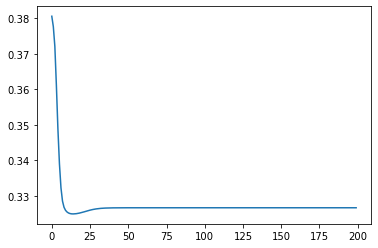

In [5]:
k=3
opts = [1.5 , 2.5 , 200 , 1e-5, 0]
ob = T2FCM(X, k, opts)
plt.plot(ob.obj_fcn)
dec = ob.predict(X)
np.argmax(dec, axis=0)

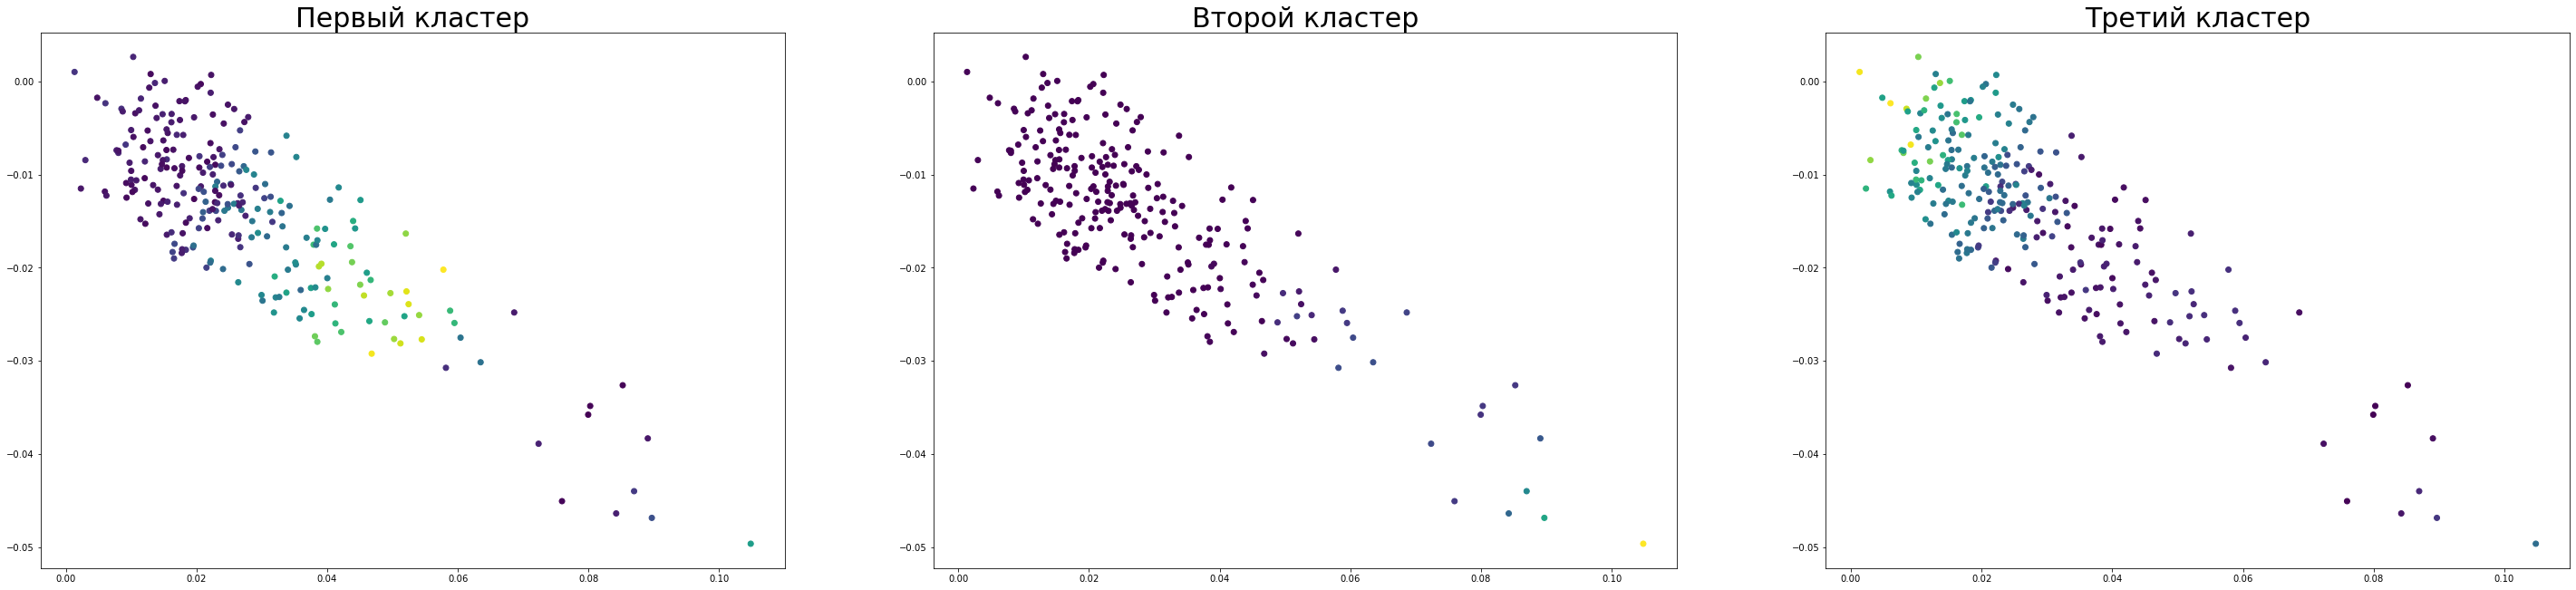

In [6]:
plt.figure(figsize=(50, 50))
plt.subplot(431)
plt.gca().set_title('Первый кластер', fontsize = 30)
plt.scatter(X[:, 0], X[:, 1], c=dec[0,:])
plt.subplot(432)
plt.gca().set_title('Второй кластер', fontsize = 30)
plt.scatter(X[:, 0], X[:, 1], c=dec[1,:])
plt.subplot(433)
plt.gca().set_title('Третий кластер', fontsize = 30)
plt.scatter(X[:, 0], X[:, 1], c=dec[2,:])

In [7]:
def find_best_cluster_count(X, max_count, func):
    best_count = 1
    best_score = -1
    all_scores = list()
    for num in range(3, max_count + 1):
        centers, L = func(X.T, 3, 2)
        xb = xie_beni(X, L)
        all_scores.append(xb)
        if xb > best_score:
            best_count = num
            best_score = xb
    return best_count, best_score, all_scores

In [8]:
clusters_count, score, scores = find_best_cluster_count(X, 12, t2fcm)
res

4


[[ 8.09683456e-02 -3.87112213e-02  2.99805131e-02  5.24191422e-02
   2.42331139e-02 -6.80153856e-02  3.72459204e-03  8.70882849e-03
  -6.51275018e-02  4.20622054e-03 -3.15730221e-03 -3.51912167e-02
  -4.28161834e-02 -6.20615754e-03 -4.91768580e-03  5.31201218e-02
  -3.22704187e-02 -2.57858958e-03 -3.86989030e-02  6.64285707e-02
   1.53083793e-02  4.22454369e-02  4.24557306e-02 -6.12569975e-02
  -3.73637844e-02  2.67499121e-02 -1.67587028e-02 -2.89425866e-02
  -2.69766936e-03 -5.46272467e-02 -9.06961306e-03  8.54756084e-03
  -3.01241732e-03 -2.22002502e-02  5.69496820e-03  1.43265593e-02
   9.21216103e-03  2.84495551e-02  1.45336511e-02  1.75525852e-02
  -1.33674363e-02  2.46459655e-02 -1.76923618e-02 -2.11393843e-02
   2.30675189e-02 -1.16215938e-02  2.45740332e-02  7.67637799e-04
   4.14915169e-03  4.12885621e-02  2.33281076e-02  4.30329060e-02
   6.44067946e-02  4.99346064e-02  3.47502665e-03  3.06782074e-02
   3.98245597e-02 -2.00877115e-02 -5.77010171e-02  3.97354356e-02
  -4.83508

array([1, 3, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 1, 3, 3, 3,
       3, 3, 1, 1, 2, 2, 0, 0, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 1, 2,
       1, 1, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 1, 0, 3, 1, 3, 1, 1,
       3, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1, 1, 2, 3,
       1, 3, 1, 2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 2, 2, 3, 2, 3, 1, 3,
       2, 1, 3, 3, 2, 1, 2, 3, 2, 1, 3, 1, 3, 1, 1, 1, 2, 2, 1, 1, 3, 1,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2, 1, 1, 2,
       3, 1, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 1, 2, 1, 2, 3, 2, 1, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1])

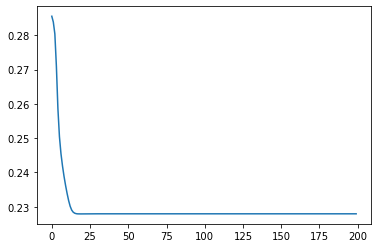

In [9]:
k=4
opts = [1.5 , 2.5 , 200 , 1e-5, 0]
ob = T2FCM(X, k, opts)
plt.plot(ob.obj_fcn)
dec = ob.predict(X)
np.argmax(dec, axis=0)